### 5.3.1 QT Designer를 이용한 UI 만들기
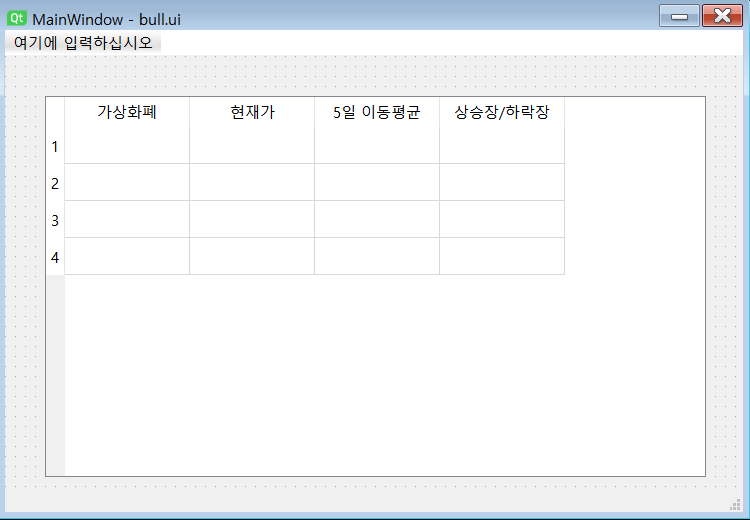

### 5.3.2 UI 불러오기

In [1]:
import sys
from PyQt5.QtWidgets import *
from PyQt5 import uic

In [2]:
form_class = uic.loadUiType('bull.ui')[0]

In [3]:
class MyWindow(QMainWindow, form_class):
    def __init__(self):
        super().__init__()
        self.setupUi(self)

In [ ]:
app = QApplication(sys.argv)
win = MyWindow()
win.show()
app.exec_()

### 5.3.3 타이머 만들기

In [3]:
from PyQt5.QtCore import *

In [6]:
class MyWindow(QMainWindow, form_class):
    def __init__(self):
        super().__init__()
        self.setupUi(self)
        
        timer = QTimer(self)
        timer.start(5000)
        timer.timeout.connect(self.timeout)
        
    def timeout(self):
        print('5초에요!!')

In [7]:
app = QApplication(sys.argv)
win = MyWindow()
win.show()
app.exec_()

5초에요!!
5초에요!!
5초에요!!


0

### 5.3.4 가상화폐 이름 출력하기
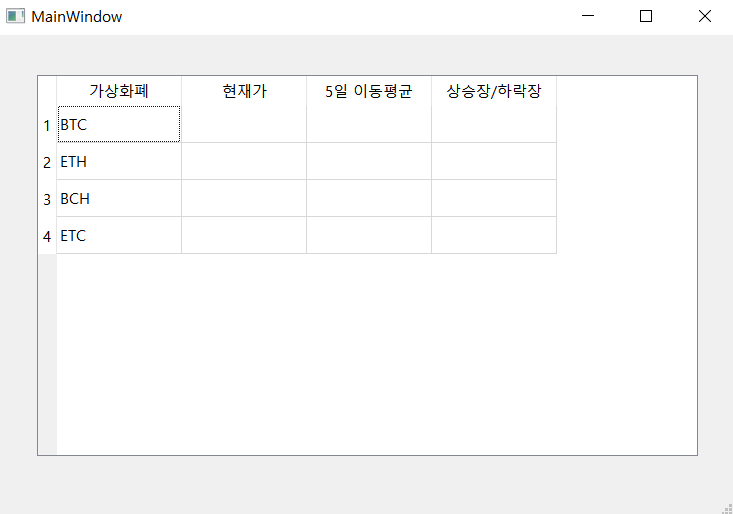

In [4]:
tickers = ['BTC', 'ETH', 'BCH', 'ETC']

In [5]:
class MyWindow(QMainWindow, form_class):
    def __init__(self):
        super().__init__()
        self.setupUi(self)
        
        timer = QTimer(self)
        timer.start(5000)
        timer.timeout.connect(self.timeout)
        
    def timeout(self):
        for i, ticker in enumerate(tickers):
            item = QTableWidgetItem(ticker)
            self.tableWidget.setItem(i, 0, item)

In [6]:
app = QApplication(sys.argv)
win = MyWindow()
win.show()
app.exec_()

0

### 5.3.5 나머지 데이터 추가하기

In [7]:
class MyWindow(QMainWindow, form_class):
    def __init__(self):
        super().__init__()
        self.setupUi(self)

    def get_market_infos(self, ticker):
        df = pybithumb.get_ohlcv(ticker)
        ma5 = df['close'].rolling(window=5).mean()
        last_ma5 = ma5[-2]
        price = pybithumb.get_current_price(ticker)
        
        state = None
        if price > last_ma5:
            state = '상승장'
        else:
            state = '하락장'
            
        return price, last_ma5, state

In [5]:
import pybithumb

In [6]:
class MyWindow(QMainWindow, form_class):
    def __init__(self):
        super().__init__()
        self.setupUi(self)

        timer = QTimer(self)
        timer.start(5000)
        timer.timeout.connect(self.timeout)

    def get_market_infos(self, ticker):
        df = pybithumb.get_ohlcv(ticker)
        ma5 = df['close'].rolling(window=5).mean()
        last_ma5 = ma5[-2]
        price = pybithumb.get_current_price(ticker)

        state = None
        if price > last_ma5:
            state = "상승장"
        else:
            state = "하락장"

        return price, last_ma5, state

    def timeout(self):
        for i, ticker in enumerate(tickers):
            item = QTableWidgetItem(ticker)
            self.tableWidget.setItem(i, 0, item)

            price, last_ma5, state = self.get_market_infos(ticker)
            self.tableWidget.setItem(i, 1, QTableWidgetItem(str(price)))
            self.tableWidget.setItem(i, 2, QTableWidgetItem(str(last_ma5)))
            self.tableWidget.setItem(i, 3, QTableWidgetItem(state))

In [7]:
app = QApplication(sys.argv)
win = MyWindow()
win.show()
app.exec_()

0

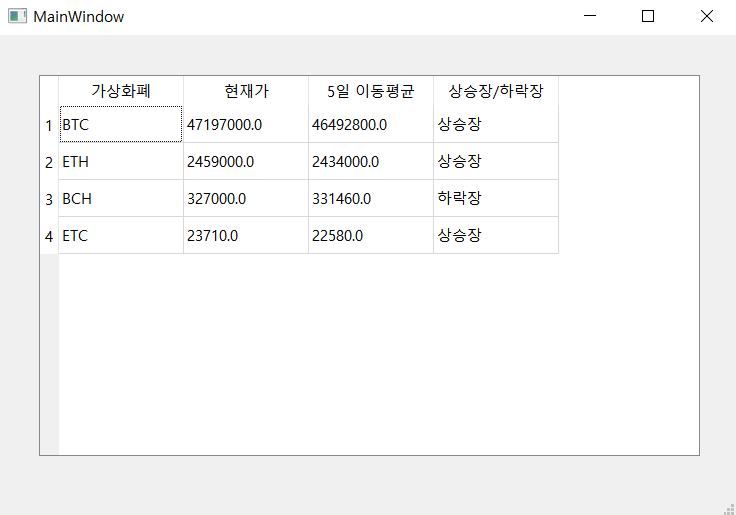